# Bootstrapping

Bootstrapping is any process that uses random sampling to sample estimates from a distribution.

Bootstrapping is great as it works on non-normal and unknown distributions. 

Bootstrapping however returns an estimation of a measurement it wont return the exact value. Bootstrapping can also be computationally intensive.

## Customer Surveys

Customers are terrible as they either have strong feelings or not very strong feelings about things. This does not lead to a normal distibution even in the slightest which can make doing statistics on customer data quite difficult.

Lets create some sample data.

In [1]:
import random

prob_dict = {0:0.2,1:0.05,2:0.03,3:0.05,4:0.08,5:0.15,6:0.1,7:0.15,8:0.3,9:0.4,10:0.5}

number_to_survey = 10000

output_list = []

for i in range(number_to_survey):
    random_x = random.randint(0,10)
    random_y = random.random()

    if random_y < prob_dict[random_x]:
        output_list.append(random_x)


(array([172.,  43.,  29.,  47.,  69., 125., 106., 170., 277., 790.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

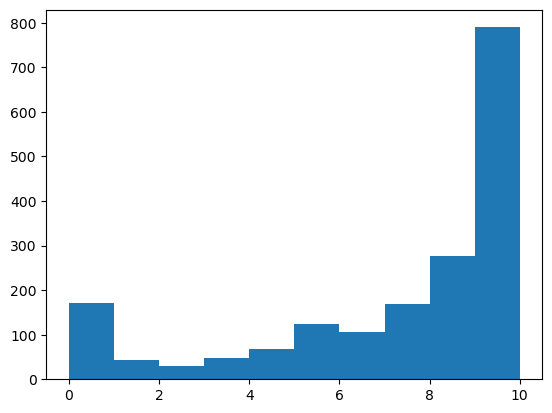

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

scores = pd.Series(output_list)
plt.hist(scores)


If we now compare our sampled results to the actual distribution specified by *prob_dict* we can see that it approachs and looks mostly similar. This is already approaching bootstrapping but we now have a real world equivlant of some results.

Changing *number_to_survey* will allow for more or less variance.

<BarContainer object of 11 artists>

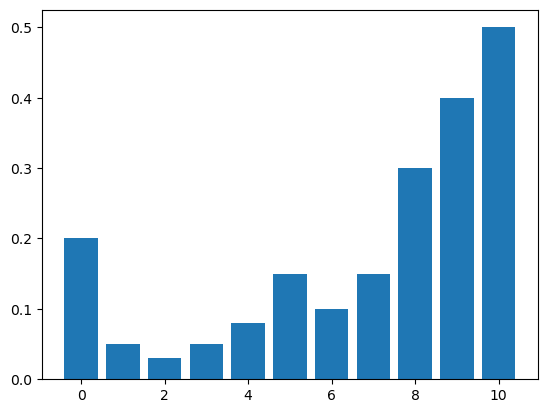

In [6]:
plt.bar(range(len(prob_dict)), list(prob_dict.values()))

## Real world example

### CMEX

Customer Happiness in the water industry is managed by the CMEX process set up by Ofwat. In this situation Ofwat take 200 people every quarter and will survey them to establish how well a water company is performing.

200 people is plenty assuming that CLT holds and we're sampling from a normal distribution. However... the distrubiton of satisfaction looks something like above. Lets do some investigation to see how much variation there can be in Ofwats method.

We could sample from our probablistic distribution. However in reality we don't actually know the probabilitys. Instead we have a larger survey that we will have to assume is representative of the population. This larger survery is *scores* that we generated earlier.

In [9]:
#Panadas makes this super easy with the sample method. Remember to set replace to True as bootstrapping is sampling with replacement.

result = scores.sample(n=200, replace=True)
result.mean()

7.26

Running the above cell a few times gives quite a large variation in the mean scores produced. Evidently ofwats sampling size isn't giving a great represntation of the mean of the population. But how bad is it?

Luckily bootstrapping has the answer. We take the following observation and repeat it a few thousand times. This allows us to see a distribution of the results and understand how random chance is impacting what we're seeing.

In [13]:
mean_list = []

number_of_runs = 5000

for i in range(number_of_runs):
    mean_list.append(scores.sample(n=200, replace=True).mean())

(array([  5.,  15.,  36., 111., 270., 498., 785., 980., 945., 712., 396.,
        176.,  54.,  13.,   4.]),
 array([6.11      , 6.22066667, 6.33133333, 6.442     , 6.55266667,
        6.66333333, 6.774     , 6.88466667, 6.99533333, 7.106     ,
        7.21666667, 7.32733333, 7.438     , 7.54866667, 7.65933333,
        7.77      ]),
 <BarContainer object of 15 artists>)

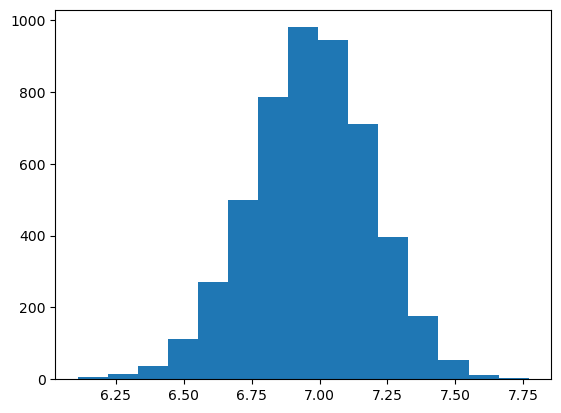

In [16]:
plt.hist(mean_list,bins=15)

In [22]:
#Now that we have the following data we can start the answer questions like.

print("Mean Result =", pd.Series(mean_list).mean())
print("Standard Deviation =", pd.Series(mean_list).std())

Mean Result = 6.969430000000034
Standard Deviation = 0.22335635811980414


Already just the graph above is very useful to explain quite a complex peice of mathematics to stakeholders. Understanding how the sampling size affects the result without something like bootstrapping can be difficult to visualise. Now we we can say that the most common result is about 7. 

It's incredibly unlikely to be scoreing less than 6.25 and as the distribution now approachs normal. 

We can follow up with some very basic knowledge like one standard deviation is about 67%. So 67% of the time the score will be above 6.77 and 95% of the time it'll be above 6.55.

Mean Result = 6.974476399999991
Standard Deviation = 0.14017575143832225


(array([  1.,   4.,  15.,  82., 214., 466., 738., 992., 998., 780., 421.,
        192.,  76.,  18.,   3.]),
 array([6.396     , 6.46866667, 6.54133333, 6.614     , 6.68666667,
        6.75933333, 6.832     , 6.90466667, 6.97733333, 7.05      ,
        7.12266667, 7.19533333, 7.268     , 7.34066667, 7.41333333,
        7.486     ]),
 <BarContainer object of 15 artists>)

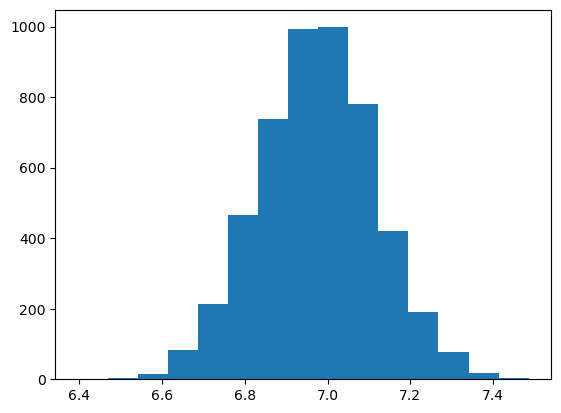

In [57]:
mean_list = []

number_of_runs = 5000
number_of_samples = 500

for i in range(number_of_runs):
    mean_list.append(scores.sample(n=number_of_samples, replace=True).mean())

print("Mean Result =", pd.Series(mean_list).mean())
print("Standard Deviation =", pd.Series(mean_list).std())

plt.hist(mean_list,bins=15)

It's trivial to run the same code while changing the number of samples. The expecation is that changing the number of samples won't change the mean but will sharpen the graph as it reduces the standard deviation.

## Onto the fun stuff.

Everything we've done so far is a bit of faff to do with traditional statistics but not really that difficult.
The real benifit of bootstrapping is being able to impliment complex business logic without really worrying how it affects the maths.

For the above example now lets try and answer the question of what would the impact be if we could take our lowest scoring people and turn them into happy people with a certain success rate. 


In [61]:
#This is will be doable in a pandas series but is easier for me in a dataframe
scores_df = pd.DataFrame(scores,columns=['Score'])

adjusted_mean_list = []

number_of_runs = 5000
number_of_samples = 500
affected_percentage = 0.6

for i in range(number_of_runs):
    df = scores_df.sample(n=number_of_samples, replace=True)

    total_zeros = df.loc[df['Score']==0].shape[0]
    total_to_change = round(total_zeros * affected_percentage)

    index_to_change = df.loc[df['Score']==0][0:total_to_change].index
    df.loc[index_to_change] = 10
    
    adjusted_mean_list.append(df['Score'].mean())

If we now plot the changes. We can see the affect that being able to convert 60% of our zeros into 10's will have both on the mean and on the results that ofwat will be surveying

(array([  4.,  13.,  37.,  97., 284., 534., 733., 935., 881., 694., 463.,
        211.,  81.,  24.,   9.]),
 array([6.955, 7.032, 7.109, 7.186, 7.263, 7.34 , 7.417, 7.494, 7.571,
        7.648, 7.725, 7.802, 7.879, 7.956, 8.033, 8.11 ]),
 <BarContainer object of 15 artists>)

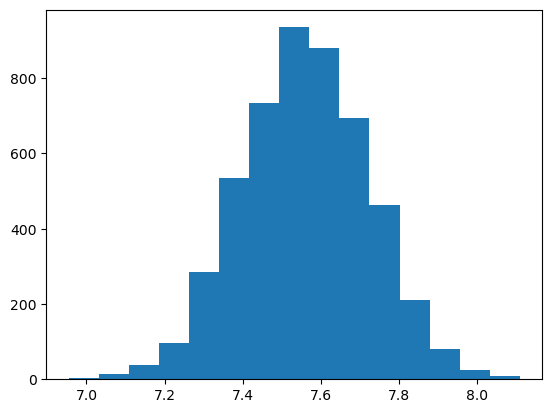

In [56]:
plt.hist(adjusted_mean_list,bins=15)

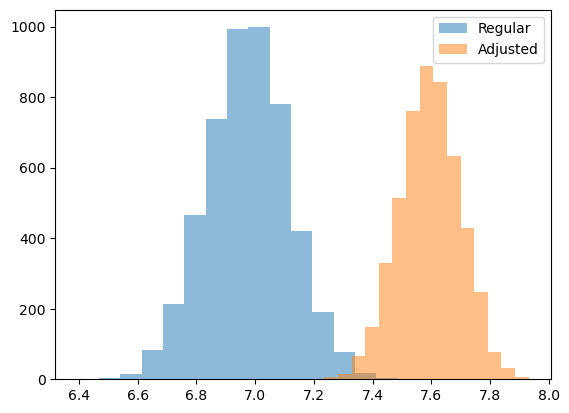

In [62]:
plt.hist(mean_list,bins=15,alpha=0.5,label='Regular')
plt.hist(adjusted_mean_list,bins=15,alpha=0.5,label='Adjusted')
plt.legend(loc='upper right')
plt.show()

At 500 samples theres very little overlap so this would likely make a good difference to the observed results.
However at 200 samples and a slightly less effective conversion percentage...

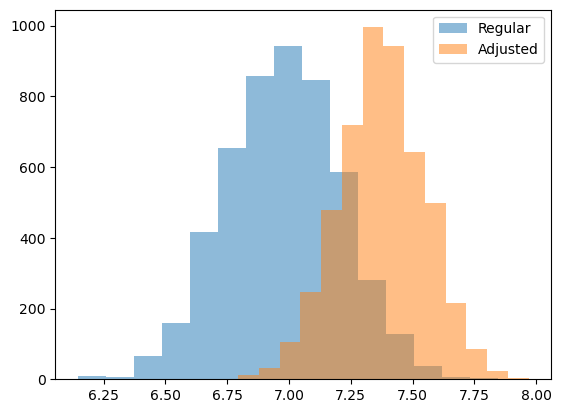

In [64]:
mean_list = []

number_of_runs = 5000
number_of_samples = 200

for i in range(number_of_runs):
    mean_list.append(scores.sample(n=number_of_samples, replace=True).mean())


scores_df = pd.DataFrame(scores,columns=['Score'])

adjusted_mean_list = []

number_of_runs = 5000
number_of_samples = 200
affected_percentage = 0.4

for i in range(number_of_runs):
    df = scores_df.sample(n=number_of_samples, replace=True)

    total_zeros = df.loc[df['Score']==0].shape[0]
    total_to_change = round(total_zeros * affected_percentage)

    index_to_change = df.loc[df['Score']==0][0:total_to_change].index
    df.loc[index_to_change] = 10
    
    adjusted_mean_list.append(df['Score'].mean())

plt.hist(mean_list,bins=15,alpha=0.5,label='Regular')
plt.hist(adjusted_mean_list,bins=15,alpha=0.5,label='Adjusted')
plt.legend(loc='upper right')
plt.show()

We see that that whilst it obviously will make a difference we see that theres a decent chance that the difference made wont always be observed.

## Now you try!

With bootstrapping prove that 2 people randomly selecting Rock Paper Scissors will have approximately a 30 percent win rate.

In [ ]:
# Your code here

As an extension. Now lets assume a player has really fast reflexs and 10 percent of the time can react to what their opponent is doing and can change their result to be a winning result. Whats the win rates look like now?

In [1]:
# Your code here